# Project title:Indian Human Image Classification Model

In [43]:
#Importing libraries
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.19 s (started: 2021-04-19 13:44:17 +05:30)


# Preprocessing

In [44]:
#1.Resize
#2.flatten
import os
import random
import ntpath
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
target=[]
images=[]
flat_data=[]
DATADIR='./Images dataset/cropped'
CATEGORIES=[]
for entry in os.scandir(DATADIR):
    if entry.is_dir():
        CATEGORIES.append(ntpath.basename(entry.path))
for category in CATEGORIES:
  class_num=CATEGORIES.index(category)#label encoding the values
  path=os.path.join(DATADIR,category)#create path to use all the images
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized=resize(img_array,(100,100,3))#resize
    flat_data.append(img_resized.flatten())#flatten
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
images=np.array(images)
target=np.array(target)
random.shuffle(flat_data)

time: 14.8 s (started: 2021-04-19 13:44:21 +05:30)


In [45]:
flat_data[0]

array([0.33535382, 0.25588324, 0.21562833, ..., 0.93360873, 0.44209804,
       0.5208048 ])

time: 2.64 ms (started: 2021-04-19 13:44:38 +05:30)


In [46]:
len(target)

1072

time: 1.72 ms (started: 2021-04-19 13:44:39 +05:30)


<BarContainer object of 2 artists>

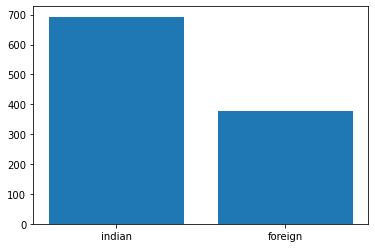

time: 123 ms (started: 2021-04-19 13:44:40 +05:30)


In [47]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

# Spliting data into training and testing

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.2,random_state=0)


time: 471 ms (started: 2021-04-19 13:44:42 +05:30)


# Support Vector Machine

In [55]:
from sklearn.svm import SVC
class_svc=SVC(kernel='rbf',random_state=0)

time: 656 µs (started: 2021-04-19 13:45:48 +05:30)


In [56]:
class_svc.fit(x_train,y_train)

SVC(random_state=0)

time: 8.33 s (started: 2021-04-19 13:45:49 +05:30)


In [57]:
y_pred=class_svc.predict(x_test)

time: 6.32 s (started: 2021-04-19 13:45:58 +05:30)


In [58]:
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

time: 2.34 ms (started: 2021-04-19 13:46:06 +05:30)


In [59]:
y_test

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

time: 2.19 ms (started: 2021-04-19 13:46:07 +05:30)


In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)*100

67.90697674418604

time: 3.01 ms (started: 2021-04-19 13:46:09 +05:30)


In [61]:
confusion_matrix(y_test,y_pred)

array([[132,  14],
       [ 55,  14]])

time: 4.57 ms (started: 2021-04-19 13:47:27 +05:30)


# Saving the model using pickle library

In [62]:
import pickle
pickle.dump(class_svc,open('humanface_detection.p','wb'))

time: 419 ms (started: 2021-04-19 13:47:28 +05:30)


In [63]:
model=pickle.load(open('humanface_detection.p','rb'))

time: 86.3 ms (started: 2021-04-19 13:47:29 +05:30)


# Testing a brand new image using URL or Imagepath

Enter your path of your downloaded image->https://www.biography.com/.image/t_share/MTczNjEwODI2NTg5MDg3MTI0/michelle-obama-gettyimages-85246899.jpg
(1199, 1200, 3)
PREDICTION OUTPUT:foreign


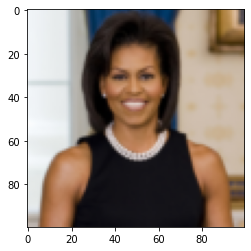

time: 9.93 s (started: 2021-04-19 14:24:20 +05:30)


In [65]:
import shutil
import os.path
from os import path
import ntpath
import cv2
import os
flat_data=[]
urls=[]
flag=0
indianfolder="./Images dataset/cropped/indian"
otherfolder="./Images dataset/cropped/foreign"
url=input('Enter your path of your downloaded image->')
file=ntpath.basename(url)
img = cv2.imread(url)
img=imread(url)
img_resized=resize(img,(100,100,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTION OUTPUT:{y_out}')
if(y_out=='Indian faces'):
    print("Saving image in indian faces folder")
    shutil.move(url,indianfolder)
    print("Done")
    
if(y_out=="Other country faces"):
    print("Saving image in other country faces folder")
    shutil.move(url,otherfolder)
    print("Done")
flat_data=[]